In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def dist(c1, c2):
    return round(np.linalg.norm(c1-c2),2)

def tour_cost(tour):
    t = len(tour)
    l = 0
    for i in range(t-1):
        l += dist(tour[i], tour[i+1])
    return l


def find_min(city, city_map):
    minimum = 100
    target = 0
    for i, c in enumerate(city_map):
        if minimum > dist(city, c):
            target = i
            minimum = dist(city, c)
    return target, minimum


def one_sided_nn(index, city_map):
    city = city_map[index]
    city_map.pop(index)
    tour = [city]
    while len(city_map) > 0:
        index,_ = find_min(city, city_map)
        city = city_map[index]
        tour.append(city)
        city_map.pop(index)
    tour.append(tour[0])
    tp = len(tour)
    for ip in range(tp-1):
        start=tour[ip]
        end=tour[ip+1]
        plt.plot([start[0], end[0]],[start[1], end[1]],'ro-')
    start=tour[0]
    end=tour[1]
    plt.plot([start[0], end[0]],[start[1], end[1]],'bo-')
    start=tour[tp-2]
    end=tour[tp-1]
    plt.plot([start[0], end[0]],[start[1], end[1]],'go-')
    plt.show()
    return tour


def two_sided_nn(index, city_map):
    city1 = city_map[index]
    city2 = city_map[index]
    city_map.pop(index)
    tour = [city1]
    while len(city_map) > 0:
        index1, cost1 = find_min(city1, city_map)
        index2, cost2 = find_min(city2, city_map)
        if cost1 < cost2:
            tour.insert(0, city_map[index1])
            city_map.pop(index1)
        else:
            tour.append(city_map[index2])
            city_map.pop(index2)
        city1 = tour[0]
        city2 = tour[-1]
    tour.append(tour[0])
    tp = len(tour)
    for ip in range(tp-1):
        start=tour[ip]
        end=tour[ip+1]
        plt.plot([start[0], end[0]],[start[1], end[1]],'ro-')
    start=tour[0]
    end=tour[1]
    plt.plot([start[0], end[0]],[start[1], end[1]],'bo-')
    start=tour[tp-2]
    end=tour[tp-1]
    plt.plot([start[0], end[0]],[start[1], end[1]],'go-')
    plt.show()
    return tour

def solve_tsp(file, opt_file, initial,mode=0):
    data = np.loadtxt(file)
    data = list(data[:, 1:3])
    index = np.loadtxt(opt_file).astype(int)
    opt_tour = [data[i-1] for i in index]
    opt_cost = tour_cost(opt_tour)    
    if mode == 0:
        tour = one_sided_nn(initial-1,data)
    else:
        tour = two_sided_nn(initial-1,data)
    return tour, opt_tour
def two_opt(tour,i,j):
    new_tour = tour
    new_tour[i:j+1] = list(reversed(tour[i:j+1]))
    return new_tour
def improve(tour):
    cost = tour_cost(tour)
    for node1 in range(1,len(tour)-2):
        for node2 in range(node1+1,len(tour)-1):
            if ((node1!=1) | (node2!=len(tour)-2)): 
                new_tour = two_opt(tour,node1,node2)
                new_cost = tour_cost(new_tour)
                if new_cost < cost:
                    cost = new_cost
                    tour = new_tour
    return cost

# ONE SIDED

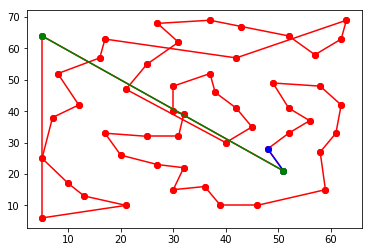

Data/eil51.dat 10
opt_cost: 429.97  cost: 558.84 =====>>> rate: 0.299718585018
opt_cost: 429.97  improve_cost: 558.84 =====>>> rate: 0.299718585018
Improvement: 0.0
-------------------------------------------------------------------------------


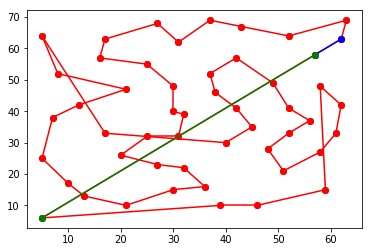

Data/eil51.dat 20
opt_cost: 429.97  cost: 567.29 =====>>> rate: 0.319371118915
opt_cost: 429.97  improve_cost: 567.29 =====>>> rate: 0.319371118915
Improvement: 0.0
-------------------------------------------------------------------------------


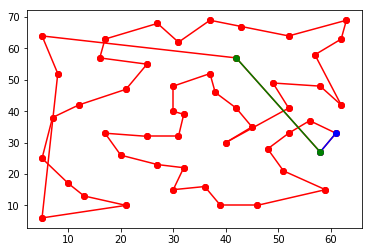

Data/eil51.dat 30
opt_cost: 429.97  cost: 520.0 =====>>> rate: 0.209386701398
opt_cost: 429.97  improve_cost: 520.0 =====>>> rate: 0.209386701398
Improvement: 0.0
-------------------------------------------------------------------------------


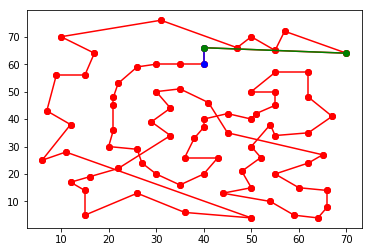

Data/eil76.dat 10
opt_cost: 545.34  cost: 640.48 =====>>> rate: 0.174459969927
opt_cost: 545.34  improve_cost: 640.48 =====>>> rate: 0.174459969927
Improvement: 0.0
-------------------------------------------------------------------------------


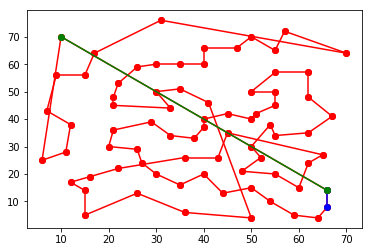

Data/eil76.dat 20
opt_cost: 545.34  cost: 735.93 =====>>> rate: 0.349488392562
opt_cost: 545.34  improve_cost: 735.93 =====>>> rate: 0.349488392562
Improvement: 0.0
-------------------------------------------------------------------------------


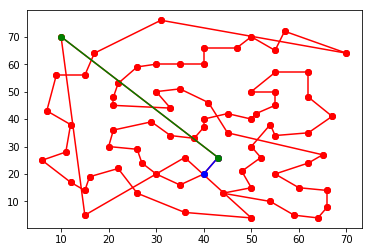

Data/eil76.dat 30
opt_cost: 545.34  cost: 730.23 =====>>> rate: 0.339036197601
opt_cost: 545.34  improve_cost: 730.23 =====>>> rate: 0.339036197601
Improvement: 0.0
-------------------------------------------------------------------------------


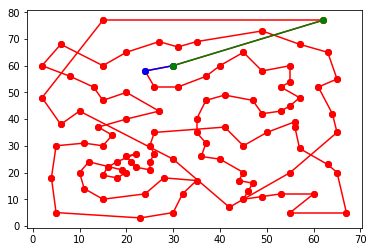

Data/eil101.dat 10
opt_cost: 642.23  cost: 795.98 =====>>> rate: 0.239400214876
opt_cost: 642.23  improve_cost: 795.98 =====>>> rate: 0.239400214876
Improvement: 0.0
-------------------------------------------------------------------------------


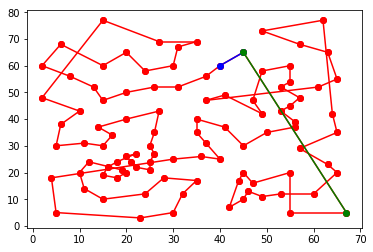

Data/eil101.dat 20
opt_cost: 642.23  cost: 800.67 =====>>> rate: 0.246702894602
opt_cost: 642.23  improve_cost: 800.67 =====>>> rate: 0.246702894602
Improvement: 0.0
-------------------------------------------------------------------------------


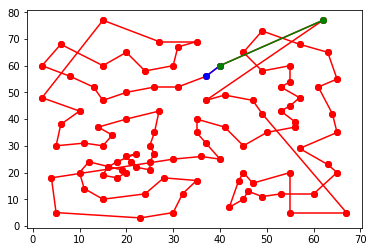

Data/eil101.dat 30
opt_cost: 642.23  cost: 776.46 =====>>> rate: 0.209006119303
opt_cost: 642.23  improve_cost: 776.46 =====>>> rate: 0.209006119303
Improvement: 0.0
-------------------------------------------------------------------------------


In [11]:
file_list = ['Data/eil51.dat','Data/eil76.dat','Data/eil101.dat']
opt_file_list = ['Data/eil51opt.dat','Data/eil76opt.dat','Data/eil101opt.dat']
initial_list = [10,20,30]
for i in range(3):
    file = file_list[i]
    opt_file = opt_file_list[i]
    for initial in initial_list:
        tour, opt_tour = solve_tsp(file,opt_file, initial,mode=0)
        cost = tour_cost(tour)
        opt_cost = tour_cost(opt_tour)
        rate = (cost-opt_cost)/opt_cost
        print(file,initial)
        print('opt_cost:',opt_cost,' cost:',cost,'=====>>>','rate:',rate)
        cost = improve(tour)
        new_rate = (cost-opt_cost)/opt_cost
        print('opt_cost:',opt_cost,' improve_cost:',cost,'=====>>>','rate:',new_rate)
        print("Improvement:",rate-new_rate)
        print("-------------------------------------------------------------------------------")

# TWO SIDED

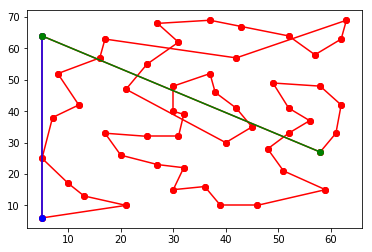

Data/eil51.dat 10
opt_cost: 429.97  cost: 558.47 =====>>> rate: 0.298858059865
opt_cost: 429.97  improve_cost: 557.36 =====>>> rate: 0.296276484406
Improvement: 0.00258157545875
-------------------------------------------------------------------------------


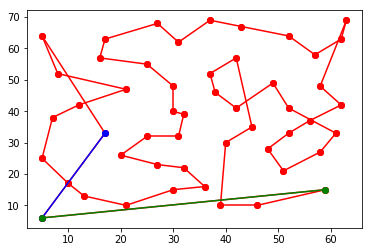

Data/eil51.dat 20
opt_cost: 429.97  cost: 545.56 =====>>> rate: 0.268832709259
opt_cost: 429.97  improve_cost: 545.56 =====>>> rate: 0.268832709259
Improvement: 0.0
-------------------------------------------------------------------------------


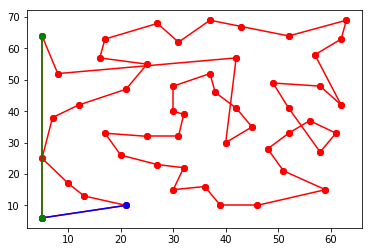

Data/eil51.dat 30
opt_cost: 429.97  cost: 520.63 =====>>> rate: 0.210851919901
opt_cost: 429.97  improve_cost: 520.63 =====>>> rate: 0.210851919901
Improvement: 0.0
-------------------------------------------------------------------------------


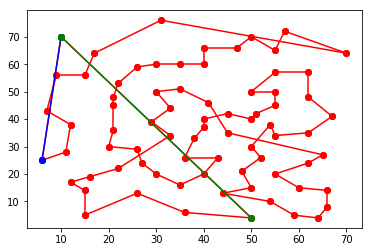

Data/eil76.dat 10
opt_cost: 545.34  cost: 699.02 =====>>> rate: 0.281805845894
opt_cost: 545.34  improve_cost: 694.96 =====>>> rate: 0.274360949133
Improvement: 0.00744489676165
-------------------------------------------------------------------------------


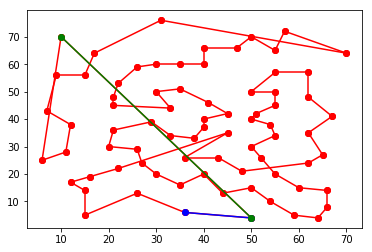

Data/eil76.dat 20
opt_cost: 545.34  cost: 699.95 =====>>> rate: 0.28351120402
opt_cost: 545.34  improve_cost: 699.95 =====>>> rate: 0.28351120402
Improvement: 0.0
-------------------------------------------------------------------------------


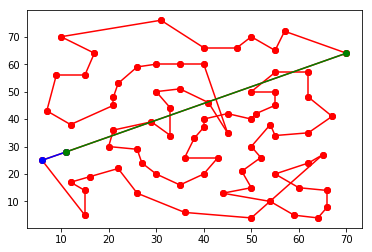

Data/eil76.dat 30
opt_cost: 545.34  cost: 662.86 =====>>> rate: 0.215498588037
opt_cost: 545.34  improve_cost: 662.86 =====>>> rate: 0.215498588037
Improvement: 0.0
-------------------------------------------------------------------------------


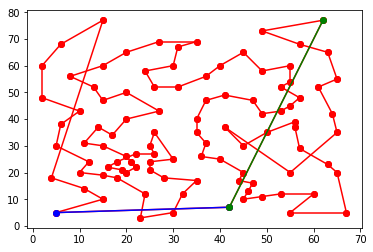

Data/eil101.dat 10
opt_cost: 642.23  cost: 816.6 =====>>> rate: 0.271507092475
opt_cost: 642.23  improve_cost: 811.88 =====>>> rate: 0.264157700512
Improvement: 0.00734939196238
-------------------------------------------------------------------------------


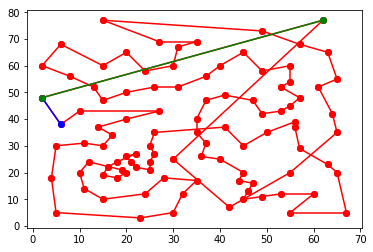

Data/eil101.dat 20
opt_cost: 642.23  cost: 833.54 =====>>> rate: 0.297883935662
opt_cost: 642.23  improve_cost: 833.54 =====>>> rate: 0.297883935662
Improvement: 0.0
-------------------------------------------------------------------------------


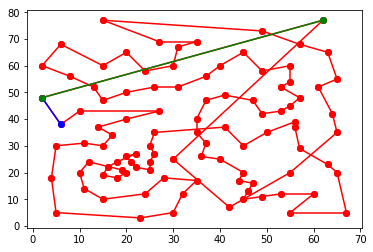

Data/eil101.dat 30
opt_cost: 642.23  cost: 833.54 =====>>> rate: 0.297883935662
opt_cost: 642.23  improve_cost: 833.54 =====>>> rate: 0.297883935662
Improvement: 0.0
-------------------------------------------------------------------------------


In [12]:
file_list = ['Data/eil51.dat','Data/eil76.dat','Data/eil101.dat']
opt_file_list = ['Data/eil51opt.dat','Data/eil76opt.dat','Data/eil101opt.dat']
initial_list = [10,20,30]
for i in range(3):
    file = file_list[i]
    opt_file = opt_file_list[i]
    for initial in initial_list:
        tour, opt_tour = solve_tsp(file,opt_file, initial,mode=1)
        cost = tour_cost(tour)
        opt_cost = tour_cost(opt_tour)
        rate = (cost-opt_cost)/opt_cost
        print(file,initial)
        print('opt_cost:',opt_cost,' cost:',cost,'=====>>>','rate:',rate)
        cost = improve(tour)
        new_rate = (cost-opt_cost)/opt_cost
        print('opt_cost:',opt_cost,' improve_cost:',cost,'=====>>>','rate:',new_rate)
        print("Improvement:",rate-new_rate)
        print("-------------------------------------------------------------------------------")